In [2]:
import pandas as pd
import numpy as np
import matplotlib
from math import sqrt as sqrt
import matplotlib.pyplot as plt
import ast
from __future__ import division

In [3]:
df_load = pd.read_excel('reliab_analysis/trip_planner/data_input/REopt_sizing_data/Optimal/clean_REopt_Load_Profile.xlsx', index_col=[0], usecols=[0,1])
df_load['load (W)'] = df_load['Electricity:Facility [kW](Hourly)'] * -1000 # Convert (kW) to (W) and power convention (buy positive and sell negative)
df_load['Electricity:Facility [kW](Hourly)'] # we do not need the column anymore
load_list = df_load['load (W)'].tolist()

df_pv = pd.read_excel('reliab_analysis/trip_planner/data_input/REopt_sizing_data/Optimal/clean_REopt_Load_Profile.xlsx', index_col=[0], usecols=[0,2])
df_pv['pv power'] = df_pv['PV power (kW)'] * 1000 # Convert (kW) to (W) and power convention
pv_list = df_pv['pv power'].tolist()

In [4]:
buy_price = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15]
sell_price = [0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]

# Outage simulator

In [5]:
# insert SoC data-series to analyze
soc_list =  [19000.0, 26999.994328160486, 34999.11487638215, 37999.703071615244, 37999.987106003304, 37999.99885049332, 37402.911015281374, 33960.50230937777, 30810.98351105911, 25595.510873981337, 19567.23253621426, 12471.021285666833, 20370.47049330776, 28291.550228413074, 36272.89009939605, 37999.96774310633, 37999.976055261664, 37999.98556957081, 37999.990009505374, 37999.9923121962, 37999.958328775705, 37999.99841835852, 34053.40482152952, 32813.0924848805, 31801.494469376143, 30970.308725500894, 30172.104428422175, 29539.5744833406, 28656.861978075925, 27779.700600684373, 27045.30983777938, 23833.16451574143, 15888.913421528525, 10073.618017284769, 8991.016682954494, 14187.964326673706, 19454.42481352121, 25533.528724380107, 31715.370419729024, 37996.346588751454, 37999.99373234146, 37999.98893890451, 37999.99798557236, 37999.99874340822, 37999.993168061905, 37253.162328243474, 32633.33659071311, 31967.325641368534, 31216.728963890084, 30337.5879881962, 29825.228911823404, 29069.972126850826, 28408.03687055915, 27666.392855760423, 27062.18676284258, 23846.159625807944, 16109.863455895374, 10630.52151620993, 10103.148292066482, 15068.913902089811, 20450.281013452135, 26416.57859432496, 32582.155049819994, 37988.98742469839, 37999.99439621176, 37999.99516309142, 37999.99565404347, 37999.98187934033, 37999.98428325051, 37999.99956703015, 37999.98310671621, 37999.98425875575, 36138.39178831384, 34697.71736300266, 33914.925659308865, 33233.5518305483, 32969.43429271406, 33269.63554787512, 37183.24847740888, 31742.950644296492, 27123.473151719983, 21464.771665958437, 16351.737115530834, 10796.774811901903, 18651.093759962932, 26596.52987712006, 34559.968413685914, 34740.05613637733, 37999.97019658058, 37999.99175749476, 37999.999016533504, 37999.98810997948, 37999.99935184158, 35405.66150742452, 30757.23263768015, 32222.35334664977, 31674.900682535757, 31041.752124436236, 30077.682199018833, 29192.81241861734, 28433.884408470003, 27489.140116588576, 33341.4524235257, 25446.30926988997, 18165.833263542612, 18530.67013710237, 25696.316668562275, 33640.96734354586, 37968.53632705893, 30330.965973239887, 36223.90666663595, 37386.92437863359, 37999.99454743419, 37999.926884476, 37999.881833519954, 37999.97227327791, 37999.983621725194, 37999.73290916917, 37999.982916323606, 37999.9964280987, 37999.92243349228, 37999.953599748034, 37999.88447187473, 37999.91443884105, 37999.936723759856, 37999.993396046695, 37999.9796136474, 37999.97540582549, 37999.98085395337, 37999.97842148839, 37999.99683710776, 37846.39182428388, 35605.86127564969, 34971.453067800154, 37999.993083698224, 37999.99852005663, 37999.99348072629, 37999.99944051264, 37999.982380278365, 37999.99108280774, 37999.99633950253, 37999.967926568206, 37999.97175392784, 37999.9962727515, 37999.99805474504, 37998.18064563607, 37145.128855582465, 35705.751619503615, 34734.84110244506, 34451.84827253158, 37999.860030313546, 32951.92211981307, 30138.501337147216, 28762.15095285004, 27249.068017547237, 32725.95456484646, 30770.608093096795, 29502.760941017175, 34129.80541601668, 37308.71695245813, 37999.994797791886, 37999.99238137734, 37999.977187023855, 37999.981797415276, 37999.97782765439, 37999.98060426129, 37999.97420561169, 37999.9774601528, 37999.97769085775, 37999.92361653691, 37660.72785331823, 36115.007901737576, 34906.29997478053, 34322.832143357016, 37999.82465124475, 32975.85993355628, 30350.91453284399, 29378.176009195035, 30455.054554769144, 26499.134450757665, 31373.90979676388, 34968.71178248508, 37999.943778310524, 37999.19331473758, 37999.29209864529, 37999.90057917165, 37999.99727329379, 37999.61652761601, 37999.800710470314, 37999.99948169098, 37999.98061732239, 37999.977663377365, 37436.7442263422, 35809.34353876309, 34503.1515114285, 33464.85393976946, 32976.752622631175, 33151.08953778049, 37999.75814082817, 32379.011842607237, 27713.257639226613, 22323.06964332042, 25202.918632583685, 33106.62169654626, 28306.84047090037, 29502.18047334197, 25270.487450330354, 33237.693882212785, 37999.974814980465, 37999.990292679526, 37999.98430418805, 37999.98485740342, 37999.99990028444, 37999.98143914376, 37999.978532087895, 37999.94255806717, 37174.02658375196, 35107.22730625564, 33985.38073064612, 33264.5837646999, 32869.0355957732, 33337.59978121818, 37999.79484272323, 32491.810044479775, 28333.56705742308, 23183.090752431126, 26382.014484816522, 20894.047505680435, 23356.4293662614, 27387.518246499567, 32780.60794864976, 37746.4874801939, 37999.957535172165, 37999.986603158075, 37999.97215838291, 37999.98809696984, 37999.939915473726, 37999.92009822646, 37541.17227128519, 35305.244140044364, 33488.425764559826, 32742.9525299799, 31929.23744831734, 31410.958389385465, 31104.29298565368, 31201.58968053692, 31264.607440642354, 24160.12657442147, 16693.120678738014, 9043.528119288989, 1579.453702300505, 6047.513138577893, 14030.842795728406, 21666.440090423377, 29620.960493371185, 37620.89713580617, 37999.95679772161, 37999.966384567495, 37999.97921105912, 37999.995284781144, 37999.99630388124, 37999.98320241738, 34308.675706785594, 34348.92452668423, 33477.500984326645, 32818.08759215009, 32251.685368032562, 31716.128813443032, 31398.4957364172, 31816.077148993623, 36353.3181103281, 30100.413949196707, 25302.247102112273, 19623.018365293363, 21082.969949741073, 28967.845547445133, 32680.629782262014, 29407.94726094631, 26644.099437916942, 34612.74452639993, 37999.96230711919, 37999.989023692106, 37999.99634951425, 37999.99975683955, 37999.99988681425, 34200.00031556037, 29050.000429763822, 30640.28803721231, 29282.74682187759, 27712.943658103402, 25772.91541835424, 22960.23895923877, 19433.494987177197, 14907.14349368697, 9738.129175728876, 3467.2174058792916, 1018.205798577439, 5760.030187610763, 10569.30594179582, 14941.931868854428, 19532.53898435442, 23840.12063049014, 28752.050250291122, 33772.51187746364, 37983.18760555197, 37999.93595132892, 37999.85542374419, 37999.99928513143, 37999.99943123193, 37053.64016088662, 34232.46842860647, 32683.490219226915, 31648.918149262634, 30610.872212364004, 30163.484044447745, 29108.902120275638, 27981.997816539908, 27450.187756447463, 26721.100140971066, 23344.574097634606, 15466.201996996553, 11005.862263961031, 10919.807638127393, 16396.585140987292, 22392.671132725525, 28654.789287307, 35516.17164114714, 37968.69045405698, 37999.994544483365, 37999.98871405887, 37999.99883397273, 37999.99964338987, 37249.990406473844, 29250.025581909227, 24553.086020035793, 27384.645040936433, 26920.14505844537]

### Parameters to be adjustable

In [10]:
SIMU_LENGTH = 24*4              # in hours



CRIT_LOAD = 0.5

BATTERY_SOC_MAX = 38000                              # in Watts-h
BATTERY_SOC_MIN = 1000                               # in Watts-h
BATTERY_CHARGE_POWER_LIMIT = -8000                  # in Watts
BATTERY_DISCHARGE_POWER_LIMIT = 8000                # in Watts

OUTAGE_MAX_LENGTH = 24*7      # in hours

# to test survival rate to an outage of specific length:
MIN_SURVIVAL=5     # in hours


### Outputs

In [11]:
# list with survivability from all simulated outages (one for each hour in SIMU_LENGTH)
survival_list = []
# average survivability as a function of start-time of the simulated outage
hourly_data = {}


In [13]:
outages_survived=0

for init_time in range(0, SIMU_LENGTH, 1):
#for init_time in range(24, len(soc_list[tag]), 1):
    
    survival = 0
    soc_simu = [0]*OUTAGE_MAX_LENGTH
    p_bat = [0]*OUTAGE_MAX_LENGTH
    soc_simu[0] = soc_list[init_time]
    for i, h in enumerate(range(init_time, init_time+OUTAGE_MAX_LENGTH-1, 1)):
        p_bat[i] = load_list[h]*CRIT_LOAD + pv_list[h]

        soc_simu[i+1] = soc_simu[i] + p_bat[i]

        if soc_simu[i+1] >= BATTERY_SOC_MAX:
            soc_simu[i+1] = BATTERY_SOC_MAX
        if soc_simu[i+1] < BATTERY_SOC_MIN:
            soc_simu[i+1] = BATTERY_SOC_MIN
            break
        survival += 1 
    if survival >= MIN_SURVIVAL:
        outages_survived+=1
    survival_list.append(survival)

avg_survival_rate = outages_survived/SIMU_LENGTH
print('probability of surviving to a MIN_SURVIVAL hours outage:', avg_survival_rate)

print('survival_list', survival_list)

print('av survival', sum(survival_list)/len(survival_list))

daily_prob=[0]*int(len(survival_list)/24)
for i in range(int(len(survival_list)/24)):
    for survival in survival_list[i*24:(i+1)*24]:
        if survival >= MIN_SURVIVAL:
            daily_prob[i] +=1
            
print("daily rate of survival:", daily_prob)

for i in range(0,24):
    hourly_data[str(i)] = [survival_list[i+24*day] for day in range(int(SIMU_LENGTH/24)-1)]
    

('probability of surviving to a MIN_SURVIVAL hours outage:', 0.8229166666666666)
('survival_list', [5, 7, 7, 6, 6, 5, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 3, 2, 3, 6, 9, 10, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 9, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 9, 11, 10, 9, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 10, 22, 21, 20, 5, 7, 7, 6, 6, 5, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 3, 2, 3, 6, 9, 10, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 9, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 9, 11, 10, 9, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 6, 10, 22, 21, 20])
('av survival', 10.03125)
('daily rate of survival:', [19, 20, 20, 20, 19, 20, 20, 20])


#### Simple boxplot to analyze survivability

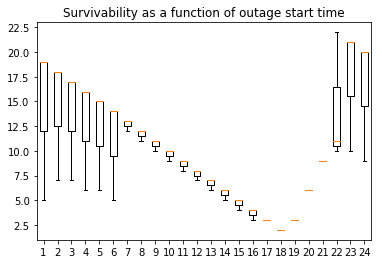

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Survivability as a function of outage start time')
ax1.boxplot([hourly_data[str(i)] for i in range(24)])
plt.show()